In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [2]:
bankcustdata = pd.read_csv('/content/Bank_customer_data.csv')

bankcustdata.head(3)

,ID,Age,Experience,Income,Zipcode,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,35,14,197000,98774,1,5904.57,1,57000,0,0,0,0,0
1,2,38,13,121000,31889,4,304.44,3,301000,1,0,0,1,0
2,3,66,17,184000,58899,2,2883.75,3,321000,0,0,0,0,0


In [4]:
# Drop unnecessary columns
bankcustdata.drop(columns=['ID', 'Zipcode'], inplace=True)

X = bankcustdata.drop(columns=['Personal Loan'])  # All features except target
y = bankcustdata['Personal Loan']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [5]:
# Define the model architecture
model = Sequential([
    Input(shape=(X_train.shape[1],)), # Input layer (number of features)
    Dense(128, activation='relu'),  # First hidden layer
    Dense(64, activation='relu'),   #  Second hidden layer
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step - accuracy: 0.3677 - loss: 0.7249 - val_accuracy: 0.7812 - val_loss: 0.6234
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8010 - loss: 0.6065 - val_accuracy: 0.8125 - val_loss: 0.5486
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8229 - loss: 0.5296 - val_accuracy: 0.8125 - val_loss: 0.5079
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.8292 - loss: 0.4777 - val_accuracy: 0.8125 - val_loss: 0.4854
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.8094 - loss: 0.4798 - val_accuracy: 0.8125 - val_loss: 0.4792
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8104 - loss: 0.4559 - val_accuracy: 0.8125 - val_loss: 0.4778
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8229 - loss: 0.4228 - val_accuracy: 0.8125 - val_loss: 0.4789
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8031 - loss: 0.4378 - val_accuracy: 0.8125 - val_loss: 0.48

In [6]:
# Evaluate on validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy:.4f}")

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6875 - loss: 1.6156
Validation Accuracy: 0.6875
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6896 - loss: 1.0998 
Test Accuracy: 0.6750


In [8]:
# Make predictions

# Make predictions
y_pred_prob = model.predict(X_test, batch_size=32).flatten()  # Use batch processing
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary labels (0 or 1)


# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print evaluation results
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-Score: {f1:.3f}")
print(f"ROC-AUC: {roc_auc:.3f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Accuracy: 0.675
Precision: 0.000
Recall: 0.000
F1-Score: 0.000
ROC-AUC: 0.566


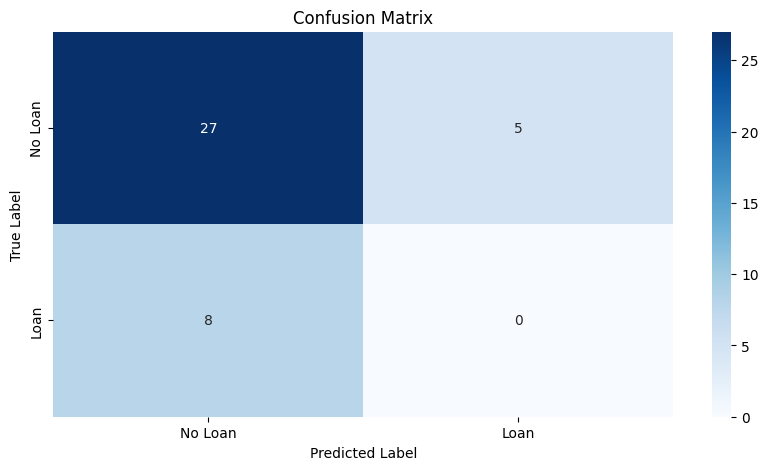

In [10]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()